# Forecasting the Sales of a Furniture store
We are using Superstore sales data for furniture sales between 2014 to 2017 and apply a simple model to forecast for 2018

## Content

1. **[Import packages](#import_packages)**
2. **[Load data](#load_data)**
3. **[Data preparation](#data_preparation)**
    - 3.1 - [Dimensions of Dataset](#data_dimension)
    - 3.2 - [Statistical Summary](#Stat_sum)
    - 3.3 - [Checking Data Type and Missing Values](#check_data_type)
    - 3.4 - [Indexing with Date](#Indexing_with_Date)
4. **[Time Series Analysis](#Time_Series_Analysis)**
    - 4.1 - [Visualizing data](#Visualizing_data)
    - 4.2 - [Sampling](#Sampling)
    - 4.3 - [Checking Stationarity](#Checking_Stationarity)
    - 4.4 - [Decomposing](#Decomposing)
5. **[Time Series Forcasting using ARIMA](#Time_Series_Forcasting_using_ARIMA)**
    - 5.1 - [Parameter Selection](#Parameter_Selection)
    - 5.2 - [Fitting the ARIMA model](#Fitting_the_ARIMA)
    - 5.3 - [Validating Forecasts](#Validating_Forecasts)
    - 5.4 - [Calculating MSE and RMSE](#Calculating_MSE_and_RMSE)
    - 5.5 - [Visualizing the Forecast](#Visualizing_the_Forecast)
6. **[Conclusion](#Conclusion)**

<a id='import_packages'></a>
# 1. Import Packages

In [1]:
import warnings
import itertools
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import seaborn as sns

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize']=14
matplotlib.rcParams['xtick.labelsize']=12
matplotlib.rcParams['ytick.labelsize']=12
matplotlib.rcParams['text.color']='k'

<a id='load_data'></a>
# 2. Load Data

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>Load the data using read_csv() function from pandas<br> 
                </font>
            </div>
        </td>
    </tr>
</table>

In [2]:
furniture = pd.read_csv(#file path,encoding='cp1252')
furniture.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


<a id='data_preparation'></a>
# 3. Data Preparation

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>The process of data preparation entails cleansing, structuring and integrating data to make it ready for analysis. <br><br>
                        Here we will analyze and prepare data to perform regression techniques:<br>
                        1. Check dimensions and data types of the dataframe <br>
                        2. Study summary statistics<br> 
                        3. Converting date into standard format<br> 
                        4. Check for missing values<br>
                        5. Study correlation<br>
                                       </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='data_dimension'></a>
# 3.1 Dimensions of Dataset
We get a quick idea of how many instances (rows) and how many attributes (columns) the data contains with the shape property.

In [3]:
# Checking structure of the data
furniture.shape

(2121, 21)

<a id='Stat_sum'></a>
# 3.2 Statistical Summary
Here we take a look at the summary of each attribute.

This includes the count, mean, the min and max values as well as percentiles.

In [4]:
furniture.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,5041.643564,55726.556341,349.834887,3.785007,0.173923,8.699327
std,2885.740258,32261.888225,503.179145,2.251620,0.181547,136.049246
min,1.000000,1040.000000,1.892000,1.000000,0.000000,-1862.312400
25%,2568.000000,22801.000000,47.040000,2.000000,0.000000,-12.849000
50%,5145.000000,60505.000000,182.220000,3.000000,0.200000,7.774800
75%,7534.000000,90032.000000,435.168000,5.000000,0.300000,33.726600
max,9991.000000,99301.000000,4416.174000,14.000000,0.700000,1013.127000


<a id='check_data_type'></a>
## 3.3 Checking for Missing Values 

In [5]:
# summary of the data 
furniture.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

Checking the stock time stamp

In [6]:
#furniture['Order Date'].min(), furniture['Order Date'].max()

We remove the columns that we do not need as well as check missing values

In [7]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
        'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
#furniture = furniture.sort_values('Order Date')

Checking for null values

In [8]:
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

<table align='left'>
    <tr>
        <td width='8%'>
            <img src='note.png'>
        </td>
        <td>
            <div align='left', style='font-size:120%'>
                    <b>There are no missing values<br>
                    </br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='Indexing_with_Date'></a>
## 3.5 Indexing with Date

Aggregate price by date

In [9]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()

In [10]:
furniture['Order Date'] = pd.to_datetime(furniture['Order Date'])
furniture.set_index('Order Date', inplace=True)
furniture.index

DatetimeIndex(['2017-01-01', '2014-01-10', '2015-01-10', '2016-01-10',
               '2014-01-11', '2016-01-11', '2017-01-12', '2014-01-13',
               '2015-01-13', '2017-01-13',
               ...
               '2014-09-07', '2015-09-07', '2017-09-07', '2014-09-08',
               '2015-09-08', '2016-09-08', '2017-09-08', '2014-09-09',
               '2016-09-09', '2017-09-09'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [11]:
furniture.head()

,Sales
Order Date,
2017-01-01,975.490
2014-01-10,51.940
2015-01-10,1018.104
2016-01-10,104.770
2014-01-11,9.940


In [12]:
furniture.shape

(889, 1)

<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
<b>Resampling the datetime data. Here we use the start of each month as the timestamp and take the average daily sales value for a particular month since working with the current datetime data becomes tricky</b>     </font>
            </div>
        </td>
    </tr>
</table>

<a id='Time_Series_Analysis'></a>
# 4. Time Series Analysis

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b> Now we analysis Time series data to do so we need to perform following steps <br><br>
                        1. Visualizing Data <br>
                        2. Sampling<br>
                        3. Checking Stationarity <br>
                        4. Decomposing<br>
                      </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='Visualizing_data'></a>
## 4.1 Visualizing data

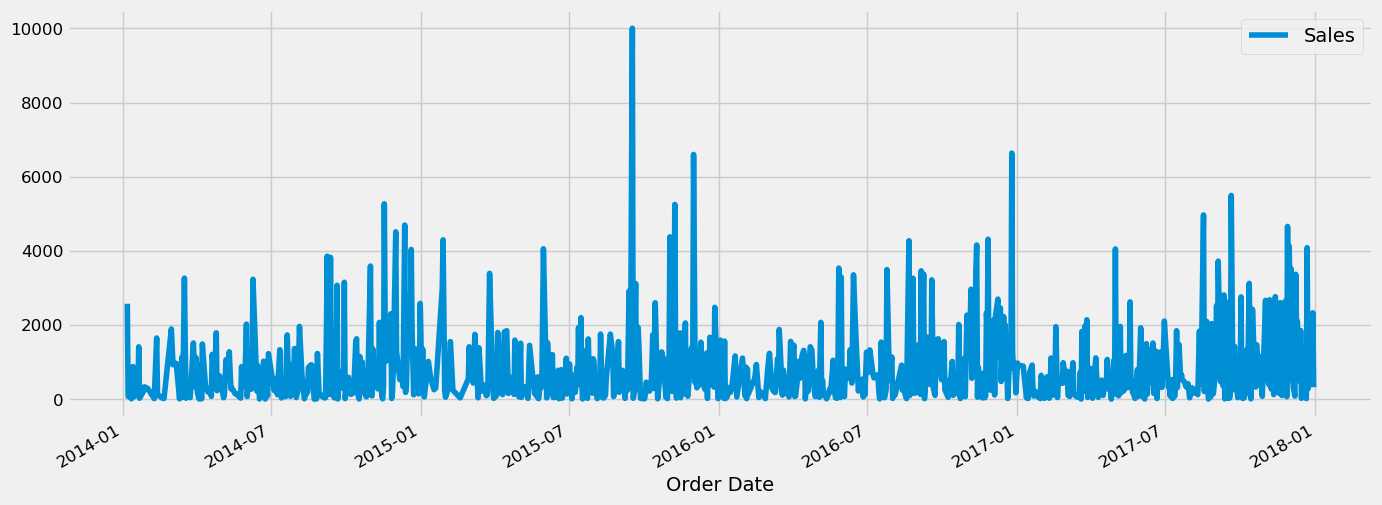

In [13]:
furniture.plot(figsize=(15, 6))
plt.show()

<a id='Sampling'></a>
## 4.2 Sampling

In [14]:
y = furniture['Sales'].resample('MS').mean()


In [15]:
y

Order Date
2014-01-01     480.194231
2014-02-01     367.931600
2014-03-01     857.291529
2014-04-01     567.488357
2014-05-01     432.049188
2014-06-01     695.059242
2014-07-01     601.169500
2014-08-01     457.521656
2014-09-01     992.353367
2014-10-01     769.015437
2014-11-01     980.221486
2014-12-01    1532.298325
2015-01-01     978.328467
2015-02-01     522.395667
2015-03-01     781.236437
2015-04-01     805.822962
2015-05-01     624.996700
2015-06-01     428.565500
2015-07-01     719.706316
2015-08-01     602.412012
2015-09-01    1382.790684
2015-10-01     632.980184
2015-11-01    1286.701354
2015-12-01    1049.355418
2016-01-01     508.182867
2016-02-01     356.868273
2016-03-01     609.575810
2016-04-01     695.373158
2016-05-01     687.265227
2016-06-01     816.910750
2016-07-01     768.736412
2016-08-01     734.307782
2016-09-01    1135.953371
2016-10-01     624.872474
2016-11-01    1271.345152
2016-12-01    1410.719808
2017-01-01     397.602133
2017-02-01     528.179800
2

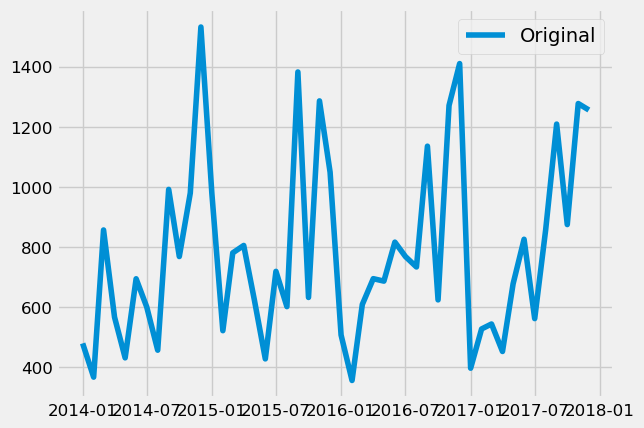

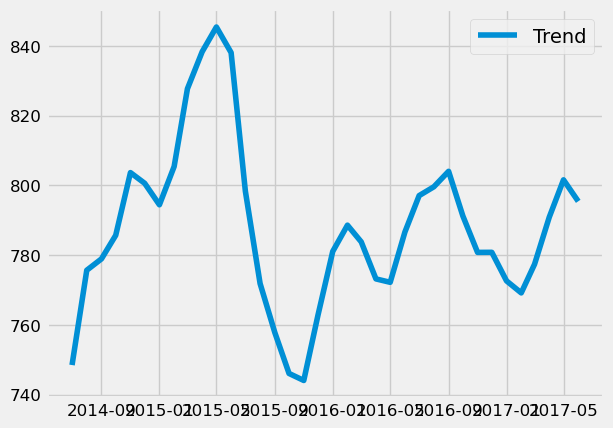

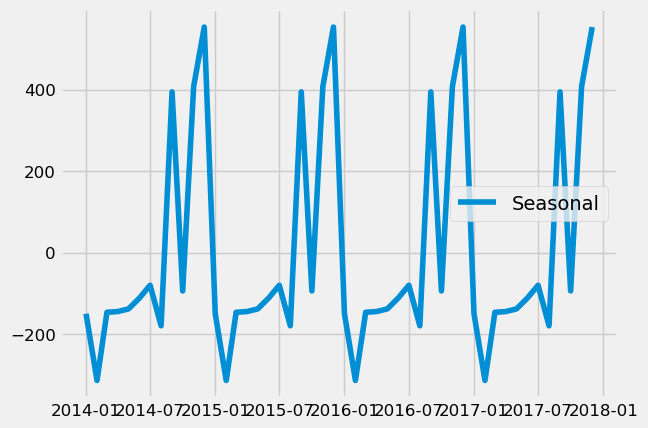

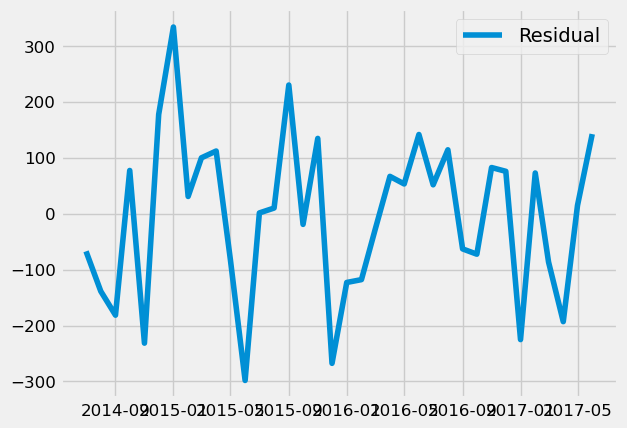

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(y)

plt.plot(y, label = 'Original')
plt.legend(loc = 'best')

trend = decomposition.trend
plt.show()
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')

seasonal = decomposition.seasonal
plt.show()
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')

residual = decomposition.resid
plt.show()
plt.plot(residual, label = 'Residual')
plt.legend(loc='best')

<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>The plot clearly indicates that the time series has seasonality pattern.The sales are always low at the beginning of the year and high at the end of the year. There is always an upward trend within any single year with a couple of low months in the mid of the year</b>
                </font>
            </div>
        </td>
    </tr>
</table>



<a id='Checking_Stationarity'></a>
## 4.3 Checking Stationarity


Our first step in time-series analysis should be to check whether there is any evidence of a trend or seasonal effects and, if there is, remove them. Augmented Dickey-Fuller(ADF) statistics is one of the more widely used statistical test to check whether your time series is stationary or non-stationary. It uses an autoregressive model and optimizes an information criterion across multiple different lag values.


**Null Hypothesis: The series has a unit root (value of a =1)(not stationary)**

**Alternate Hypothesis: The series has no unit root (stationary)**

In [17]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.191070
p-value: 0.000009
Critical Values:
	1%: -3.621
	5%: -2.944
	10%: -2.610


<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>We can see that our statistic value of -5.191070 is less than the value of -3.621 at 1%. This suggests that we can reject the null hypothesis with a significance level of less than 1% (i.e. a low probability that the result is a statistical fluke). Rejecting the null hypothesis means that the process has no unit root, and in turn that the time series is stationary or does not have time-dependent structure.

The p-value is 0.000009, which is way below the threshold (0.05). Hence the null-hypothesis is rejected. It suggests the time series does not have a unit root, meaning it is stationary.</b>
                </font>
            </div>
        </td>
    </tr>
</table>



<a id='Decomposing'></a>
## 4.4 Decomposing

Decomposing the time series into three distinct components: trend, seasonality, and noise.

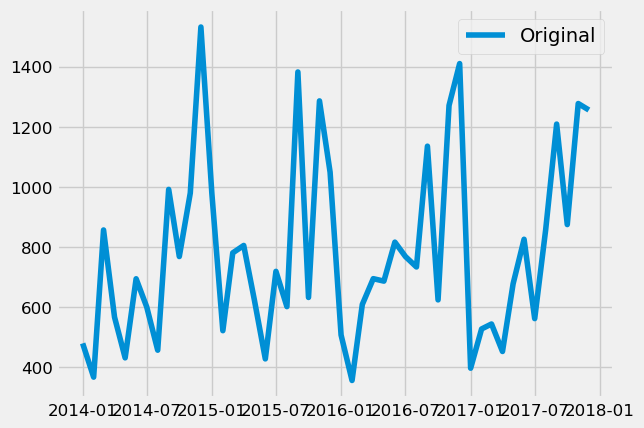

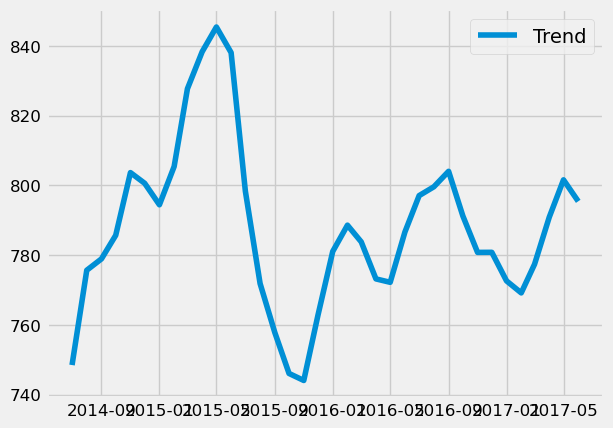

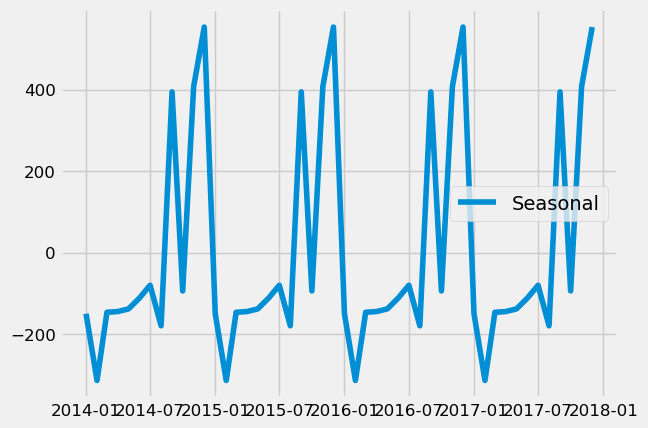

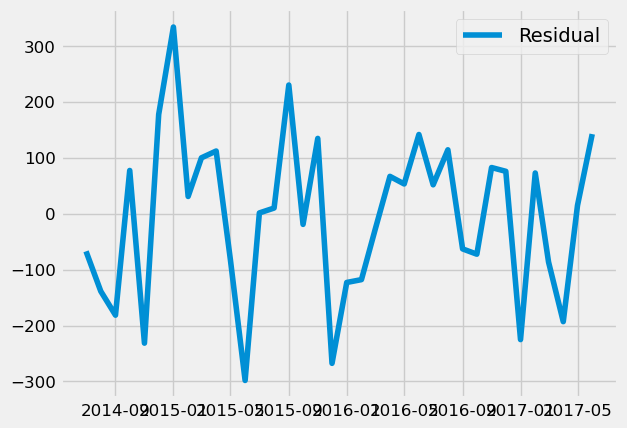

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(y)

plt.plot(y, label = 'Original')
plt.legend(loc = 'best')

trend = decomposition.trend
plt.show()
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')

seasonal = decomposition.seasonal
plt.show()
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')

residual = decomposition.resid
plt.show()
plt.plot(residual, label = 'Residual')
plt.legend(loc='best')

<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>By visualizing the decomposed components of the original time series we can say that the price of stock is unstable, along with its obvious seasonality.</b>
                </font>
            </div>
        </td>
    </tr>
</table>




<a id='Time_Series_Forcasting_using_ARIMA'></a>
# 5. Time Series Forcasting using ARIMA

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b> We will use ARIMA for forecasting our time series. ARIMA is also denoted as ARIMA(p,d,q) where p,d,q accounts for seasonality, trend and noise in the time series data</b>
                </font>
            </div>
        </td>
    </tr>
</table>


In [19]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

#pdq            seasonal_pdq 
# 0 0 0         0 0 0 12
# 0 0 1         0 0 1 12  
# 0 1 0         0 1 0 12
# 0 1 1         0 1 1 12
# 1 0 0         1 0 0 12
# 1 0 1         1 0 1 12 
# 1 1 0         1 1 0 12 
# 1 1 1         1 1 1 12

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


<a id='Parameter_Selection'></a>
## 5.1 Parameter Selection 

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>We use “grid search” to find the optimal set of parameters that yields the best performance for our model</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [20]:
from pylab import rcParams
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order=param, seasonal_order=param_seasonal, enforce_stationarity=False, 
enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:          
            continue
#Invertibility refers to linear stationary process which behaves like infinite representation of autoregressive. In other word,
#this is the property that possessed by a moving average process.

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:769.0817523205915
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1374.294256061431
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:477.71701309212006
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:302.2702899793683
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:497.2314433418338
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:977.4114391755996
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:318.00471991163414
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:304.2488280302707
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:720.9252270758096
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2688.8045397577957
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:466.5607429809157
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:291.6261389673276
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:499.573399692085
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2440.0997862338
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:319.9884876946868
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:291.872557643564
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:677.8947668414504
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1197.8112674437089
ARIMA(0, 1

<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>We are selecting those parameter which has minimum AIC score</b>
                </font>
            </div>
        </td>
    </tr>
</table>



<a id='Fitting_the_ARIMA'></a>
## 5.2 Fitting the ARIMA model

In [21]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0854      0.240      0.356      0.722      -0.385       0.556
ma.L1         -1.0000   3175.183     -0.000      1.000   -6224.245    6222.245
ar.S.L12       0.0274      0.512      0.053      0.957      -0.977       1.032
ma.S.L12      -1.0001   3174.841     -0.000      1.000   -6223.574    6221.574
sigma2      2.715e+04      0.050   5.42e+05      0.000    2.71e+04    2.71e+04


The summary attribute that results from the output of SARIMAX returns a significant amount of information, but we’ll focus our
attention on the table of coefficients. The coef column shows the weight (i.e. importance) of each feature and how each one
impacts the time series. The P>|z| column informs us of the significance of each feature weight.

**Running model diagnostiscs to check any unusual behaviour**
<br>1. If the model is correctly specified and the parameter estimates are reasonably close to the true values, then the residuals should have nearly the properties of white noise.

<br>2. Plots can be used to better understand the distribution of errors beyond summary statistics. We would expect the forecast errors to be normally distributed around a zero mean.

<br>3. The Q-Q plot can be used to quickly check the normality of the distribution of residual errors.

<br>4. Finally, visualizing the autocorrelation for the residual errors. The x-axis shows the lag and the y-axis shows the correlation between an observation and the lag variable, where correlation values are between -1 and 1 for negative and positive correlations respectively. We would not expect there to be any correlation between the residuals. This would be shown by autocorrelation scores being below the threshold of significance (dashed and dotted horizontal lines on the plot).

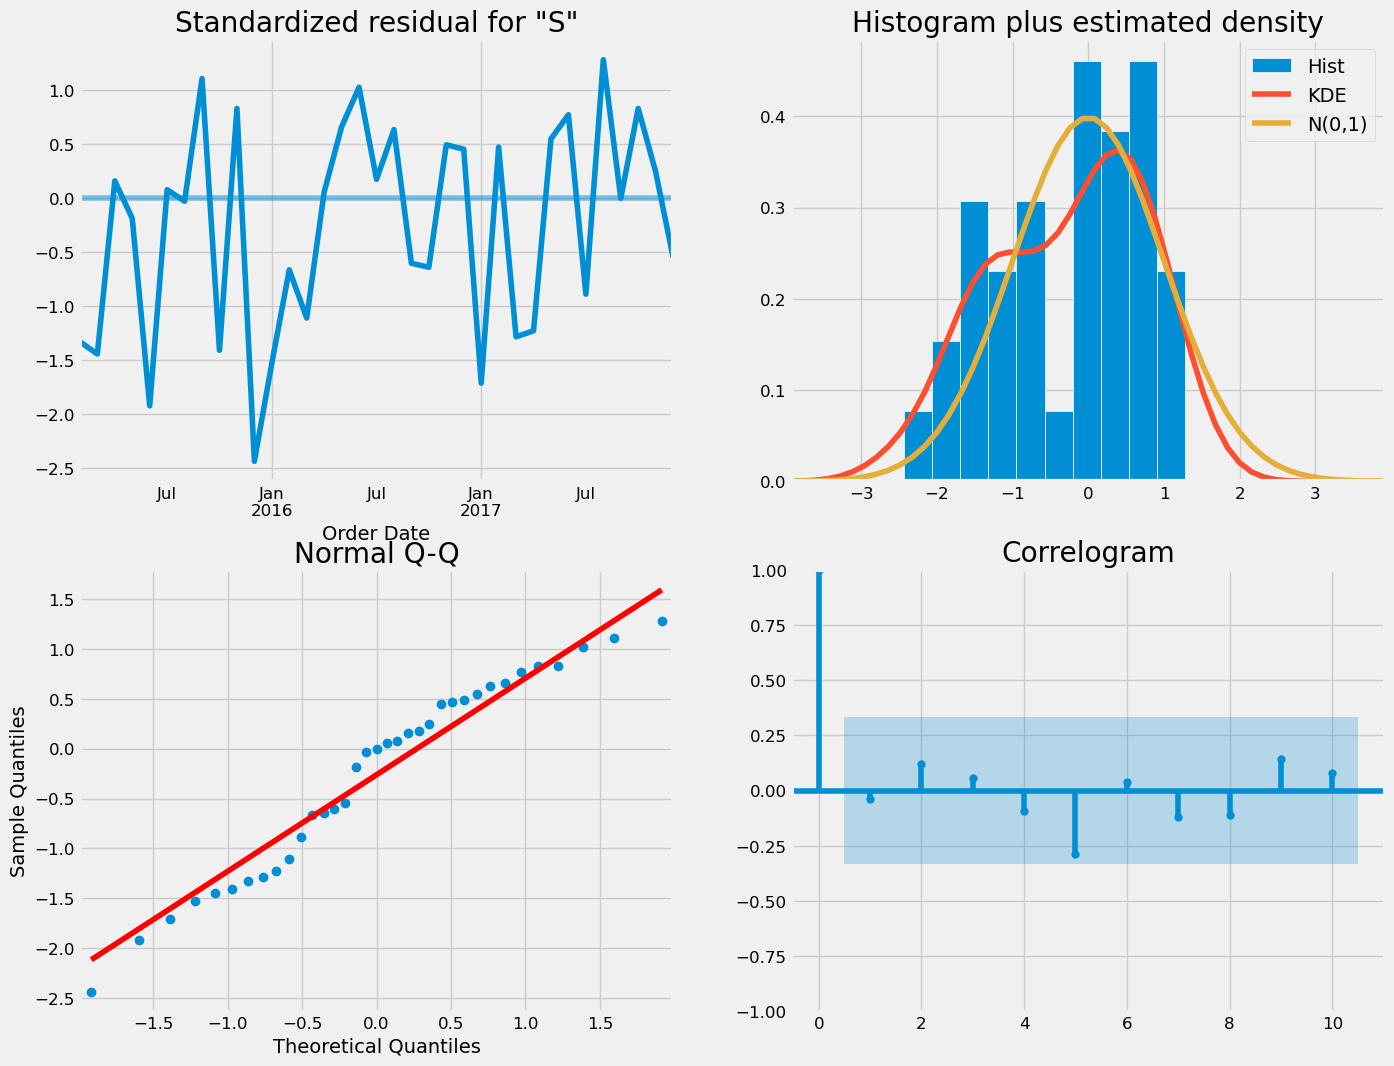

In [22]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>The model diagnostics indicates that the model residuals are near normally distributed</b>
                </font>
            </div>
        </td>
    </tr>
</table>




<a id='Validating_Forecasts'></a>
## 5.3 Validating Forecasts

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>We compare predicted sales to real sales of the time series to understand the accuracy of our forecasts</b>
                </font>
            </div>
        </td>
    </tr>
</table>

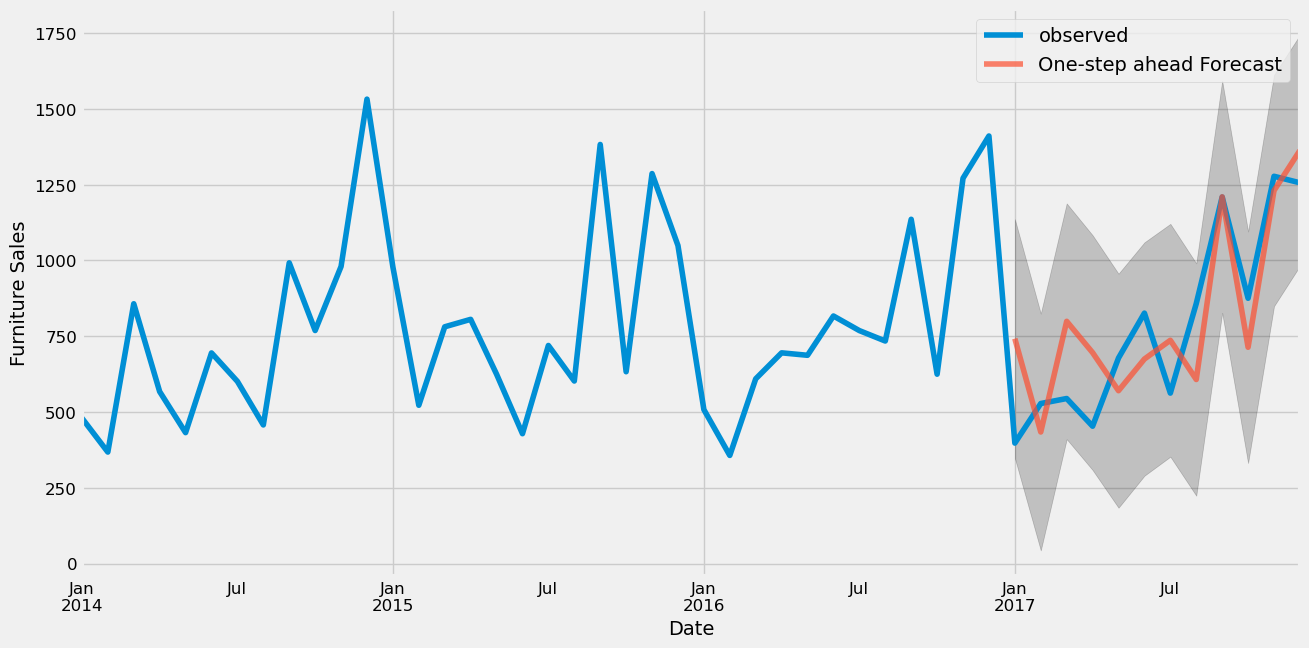

In [23]:
#set forecasts to start at 2017–01–01 to the end of the data to forecast
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=0.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

#The dynamic=False argument ensures that we produce one-step ahead forecasts, meaning that forecasts at each point are generated
#using the full history up to that point.

#https://matplotlib.org       - One of the best web reference to understand visualization functions and their parameters 
#https://www.statsmodels.org
#https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-arima-in-python-3

The above plot indicates the observed value and the rolling forecast predications (A rolling forecast is an add/drop process for predicting the future over a set period of time). The predicated values align well with the true values.

<a id="Calculating_MSE_and_RMSE"> </a>
## 5.4 Calculating MSE and RMSE


In [24]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 34904.03
The Root Mean Squared Error of our forecasts is 186.83


<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>MSE measures the average of the squares of the errors of an estimator i.e. the average squared difference between the estimated values and what is estimated. RMSE tells us that our model was able to forecast the average daily furniture sales in the test set within 160.36 of the real sales..</b>
                </font>
            </div>
        </td>
    </tr>
</table>



<a id="Visualizing_the_Forecast"> </a>
## 5.5 Visualizing the Forecast 


            lower Sales  upper Sales
2018-01-01   250.479997  1000.538570
2018-02-01   116.186277   872.709985
2018-03-01   359.961531  1116.864792
2018-04-01   291.950010  1048.885173
2018-05-01   275.399700  1032.337671
2018-06-01   363.459529  1120.397752
2018-07-01   327.346812  1084.285078
2018-08-01   338.748719  1095.687172
2018-09-01   842.470307  1599.410419
2018-10-01   403.477218  1160.432244
2018-11-01   869.496969  1626.582474
2018-12-01   964.042838  1721.830964
2019-01-01   260.071030  1052.379999


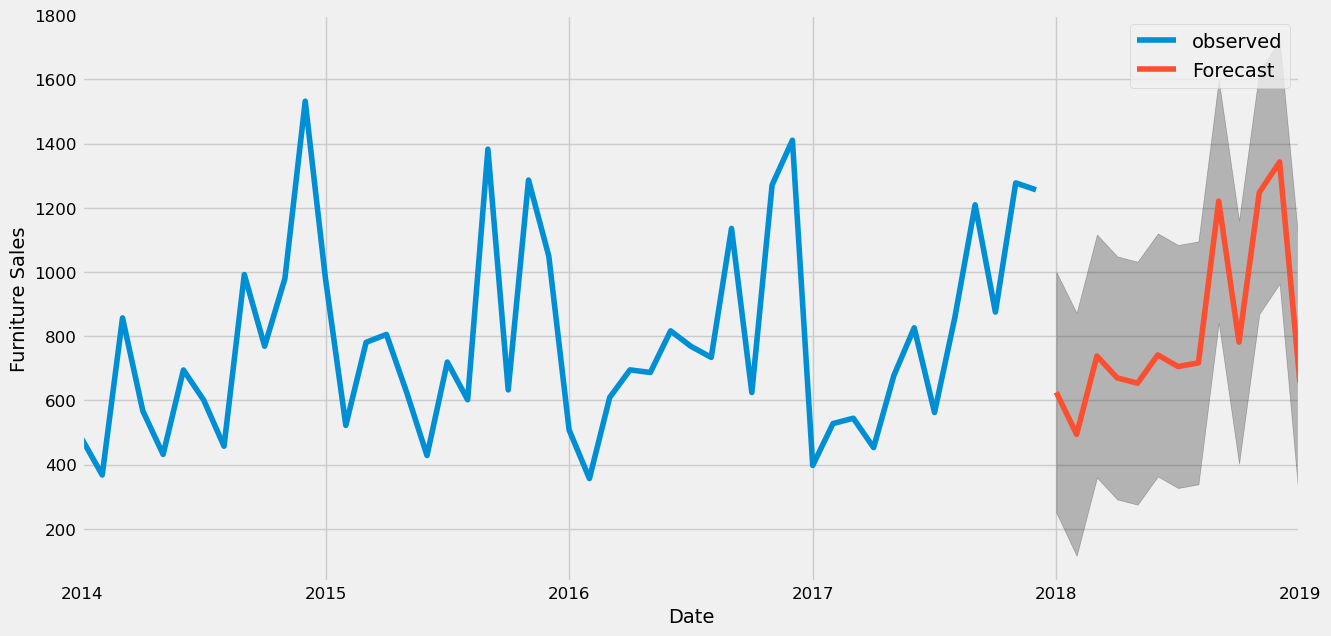

In [25]:
pred_uc = results.get_forecast(steps=13)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
print(pred_ci)
plt.legend()
plt.show()

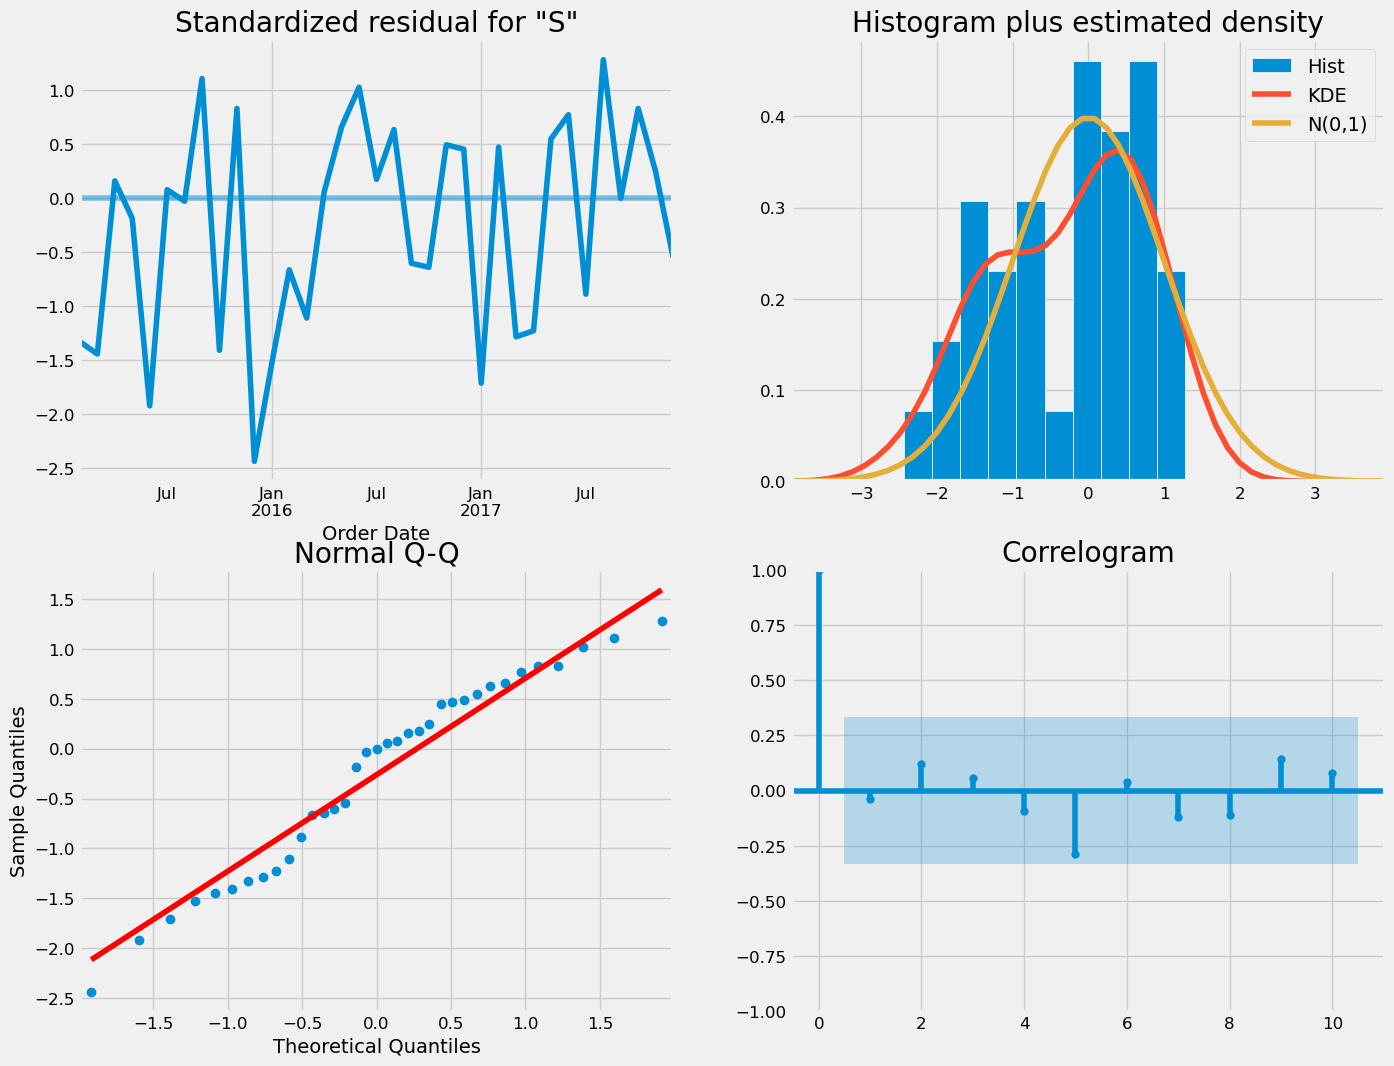

In [26]:
results.plot_diagnostics(figsize=(15,12))
plt.show()

<a id="Conclusion"> </a>
# Conclusion

We observe that sales of furniture produces seasonal pattern. Early of the year is the off season for furniture sales in the superstore. The sales for furniture increases linearly over time.

#Moving Average
#--------------
#A moving average is defined as an average of fixed number of items in the time series which move
#through the series by dropping the top items of the previous averaged group and adding the next in
#each successive average